# Tensorflow Core Algorithms
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

import tensorflow.feature_column as fc
import tensorflow as tf

## Linear Regression
Linear corresponance between datapoints

In [15]:
# Load datasets

X_train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")  # train data
X_test = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")  # test data

In [16]:
X_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [17]:
X_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [18]:
y_train = X_train.pop("survived")
y_test = X_test.pop("survived")

In [19]:
X_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<AxesSubplot:>

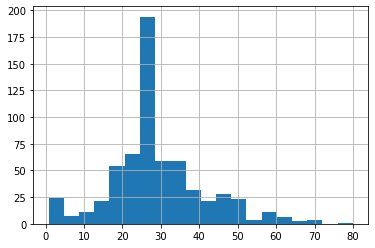

In [25]:
X_train.age.hist(bins=20)

<AxesSubplot:>

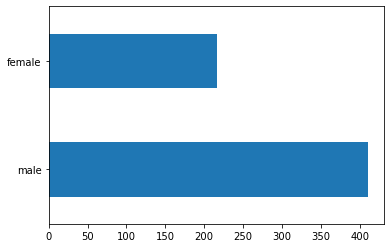

In [32]:
X_train["sex"].value_counts().plot(kind="barh")

<AxesSubplot:>

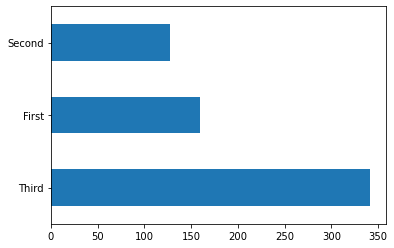

In [33]:
X_train["class"].value_counts().plot(kind="barh")

Text(0.5, 0, ' % survival chance')

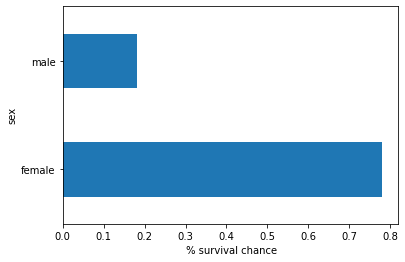

In [39]:
pd.concat([X_train, y_train], axis=1).groupby('sex')["survived"].mean()\
    .plot(kind="barh").set_xlabel(" % survival chance")

In [40]:
X_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [42]:
categorical_columns = ["sex", "class", "deck", "parch", "embark_town", "alone", "n_siblings_spouses"]
numeric_columns = ["age", "fare"]

feature_columns = []
for feature_name in categorical_columns:
    vocabulary = X_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


display(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int6

## Input Function
Convert data into batches so model can learn 

In [46]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

In [47]:
train_input_fn = make_input_fn(X_train, y_train)
test_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

In [48]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpo7498f0_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
linear_est.train(train_input_fn)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpo7498f0_/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 51.8317
INFO:tensorflow:loss = 0.4382811, step = 100 (1.930 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into /tmp

In [51]:
result = linear_est.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-01-04T15:50:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpo7498f0_/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.96171s
INFO:tensorflow:Finished evaluation at 2023-01-04-15:50:58
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7537879, accuracy_baseline = 0.625, auc = 0.83458835, auc_precision_recall = 0.79503536, average_loss = 0.47111937, global_step = 200, label/mean = 0.375, loss = 0.46248192, precision = 0.6770833, prediction/mean = 0.37792665, recall = 0.65656567
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmpo7498f0_/model.ckpt-200


In [52]:
display(result)

{'accuracy': 0.7537879,
 'accuracy_baseline': 0.625,
 'auc': 0.83458835,
 'auc_precision_recall': 0.79503536,
 'average_loss': 0.47111937,
 'label/mean': 0.375,
 'loss': 0.46248192,
 'precision': 0.6770833,
 'prediction/mean': 0.37792665,
 'recall': 0.65656567,
 'global_step': 200}

In [53]:
result = list(linear_est.predict(test_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpo7498f0_/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [63]:
display(result[0]['probabilities'])
display(result[0]['probabilities'][1])  # Not Survived - idx 0, Survived - idx 1

array([0.92681456, 0.07318545], dtype=float32)

0.07318545

In [64]:
y_test.loc[3]

1

In [69]:
display(result[3]['probabilities'])

array([0.37408328, 0.6259167 ], dtype=float32)

# Classification

## Dataset
This specific dataset seperates flowers into 3 different classes of species.
- Setosa
- Versicolor
- Virginica

The information about each flower is the following.
- sepal length
- sepal width
- petal length
- petal width

In [75]:
column_names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
species = ["Setosa", "Versicolor", "Virginica"]

In [81]:
train_path = tf.keras.utils.get_file("iris_training.csv",  "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

X_train = pd.read_csv(train_path, names=column_names, header=0)
y_train = pd.read_csv(test_path, names=column_names, header=0)

In [82]:
train_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [83]:
X_test = X_train.pop("Species")
y_test = y_train.pop("Species")

In [85]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


## Input Function

In [87]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    
    # Shuffle and repeat if training
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

## Feature Columns

In [89]:
feature_columns = []
for key in X_train.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))

## Building Model

- DNNClassifier (Deep Neural Network)
- LinearClassifier

In [91]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively
    hidden_units=[30, 10],
    # Choose between 3 classes
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpum99o5ty', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training

In [97]:
classifier.train(
    input_fn=lambda: input_fn(X_train, X_test, training=True), steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpum99o5ty/model.ckpt-5
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5...
INFO:tensorflow:Saving checkpoints for 5 into /tmp/tmpum99o5ty/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5...
INFO:tensorflow:loss = 2.2234735, step = 5
INFO:tensorflow:global_step/sec: 265.135
INFO:tensorflow:loss = 1.5384171, step = 105 (0.378 sec)
INFO:tensorflow:global_step/sec: 337.088
INFO:tensorflow:loss = 1.2982359, step = 205 (0.297 sec)
INFO:tensorflow:global_step/sec: 339.607
INFO:tensorflow:loss = 1.146658, step = 305 (0.294 sec)
INFO:tensorflow:global_step/sec: 336.795
INFO:tensorflow:loss

In [102]:
classifier_result = classifier.evaluate(input_fn=lambda: input_fn(y_train, y_test, training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-01-04T17:11:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpum99o5ty/model.ckpt-5005
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.13772s
INFO:tensorflow:Finished evaluation at 2023-01-04-17:11:25
INFO:tensorflow:Saving dict for global step 5005: accuracy = 0.53333336, average_loss = 0.9253236, global_step = 5005, loss = 0.9253236
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5005: /tmp/tmpum99o5ty/model.ckpt-5005


In [118]:
features = column_names[:-1]
predict = {}

In [119]:
features

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [121]:
print("Enter numeric values only \t :")
for feature in features:
    val = input(feature + ":")
    if not val.isdigit(): 
        break
    predict[feature] = [float(val)]

Enter numeric values only 	 :


SepalLength: 2
SepalWidth: 3
PetalLength: 4
PetalWidth: 5


In [122]:
predict

{'SepalLength': [2.0],
 'SepalWidth': [3.0],
 'PetalLength': [4.0],
 'PetalWidth': [5.0]}

In [125]:
def input_fn_predict(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
    

In [130]:
predictions = classifier.predict(input_fn=lambda: input_fn_predict(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    print(f"Prediction is {species[class_id]} with {probability*100} probability")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpum99o5ty/model.ckpt-5005
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is Virginica with 69.60121989250183 probability


## Clustering